In [148]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import datetime
from pathlib import Path

In [191]:
def RMSE(data_predict,dataY_plot):
    c = 0
    for i in range(len(data_predict)):
        c = c + abs(data_predict[i][0] - dataY_plot[i][0]) ** 2
    
    return (c ** 0.5)/len(data_predict)

In [155]:
def dataloader(X,y,batch_size=4):
    loader = list()
    points = len(X)
    
    i = 0
    end = i + batch_size
    batch = dict()
    
    batch["data"] = X[i:end]
    batch["output"] = y[i:end]
    loader.append(batch)
    
    while end < points:
        i = i + batch_size
        end = i + batch_size
        
        
        batch = dict()
        batch["data"] = X[i:end]
        batch["output"] = y[i:end]
        
        loader.append(batch)
    
    return loader

In [187]:
class LSTM_Final(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM_Final, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out

In [203]:
model2_total = pd.read_csv("./predictions/salesAnalyzer/total/store_{}.csv".format(store))
model2_total.iloc[:-15,:]

,TIME_DIM_KEY,DOY_STD,AVG_TEMPERATURE_AIR_2M_F,AVG_TEMPERATURE_WETBULB_2M_F,AVG_TEMPERATURE_DEWPOINT_2M_F,AVG_TEMPERATURE_FEELSLIKE_2M_F,AVG_HUMIDITY_RELATIVE_2M_PCT,AVG_HUMIDITY_SPECIFIC_2M_GPKG,AVG_PRESSURE_2M_MB,AVG_PRESSURE_MEAN_SEA_LEVEL_MB,...,AVG_WIND_DIRECTION_10M_DEG,AVG_WIND_DIRECTION_80M_DEG,AVG_WIND_DIRECTION_100M_DEG,TOT_PRECIPITATION_IN,TOT_SNOWFALL_IN,AVG_CLOUD_COVER_TOT_PCT,AVG_RADIATION_SOLAR_TOTAL_WPM2,TOT_RADIATION_SOLAR_TOTAL_WPM2,FORECAST,FORECAST_2
0,20160116,16,11.7,12.3,15.8,14.3,15.0,1.3,-15.9,-16.0,...,-73,-55,-54,-0.15,-0.74,17,-28.3,-681.5,308,106
1,20160117,17,5.1,4.6,4.4,7.9,-2.0,0.1,-9.1,-7.6,...,13,62,62,-0.19,-1.38,-5,1.7,39.7,318,100
2,20160118,18,-1.3,-1.4,-1.5,-3.3,-2.0,-0.3,-14.2,-11.3,...,-16,18,18,-0.15,-0.54,19,-16.3,-393.0,323,98
3,20160119,19,-9.0,-8.9,-9.9,-14.4,-5.0,-0.9,-9.1,-6.2,...,-31,28,28,-0.19,-1.48,10,-5.4,-132.0,355,100
4,20160120,20,-1.4,-1.6,-2.2,-6.1,-3.0,-0.5,-1.5,0.6,...,-5,42,42,-0.18,-1.50,-15,11.9,284.7,335,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,20210903,246,-3.1,-2.8,-2.8,-3.3,0.0,-1.3,-3.3,0.1,...,41,70,69,-0.25,0.00,-1,-29.1,-699.4,188,79
1628,20210904,247,-1.5,-2.4,-3.3,-1.7,-5.0,-1.4,-4.0,-2.1,...,37,67,65,-0.25,0.00,-24,47.8,1147.1,188,94
1629,20210905,248,-1.8,-0.2,1.0,-1.8,6.0,0.1,-9.0,-6.9,...,-100,-73,-70,-0.26,0.00,32,-34.4,-825.4,222,80
1630,20210906,249,-2.1,-0.3,1.0,-2.2,8.0,0.1,-11.0,-8.5,...,-41,0,-3,0.02,0.00,-2,-2.4,-56.2,140,69


__STORE NO 1__
Training Shape torch.Size([1298, 1, 3]) torch.Size([1298, 1])
Testing Shape torch.Size([324, 1, 3]) torch.Size([324, 1])
Validation Loss Decreased(inf--->0.01005) 	 Saving The Model
Epoch 100 		 Training Loss: 0.00613 		 Validation Loss: 0.01090
Epoch 200 		 Training Loss: 0.00577 		 Validation Loss: 0.01147
Epoch 300 		 Training Loss: 0.00559 		 Validation Loss: 0.01202
Epoch 400 		 Training Loss: 0.00543 		 Validation Loss: 0.01257
Epoch 500 		 Training Loss: 0.00531 		 Validation Loss: 0.01240
Stopping the training early		Model saved
	Training Loss:  0.005156769633314432
	Validation Loss:  0.010051398111196855
Shape of data_predict (324, 1)
Shape of dataY_plot (324, 1)


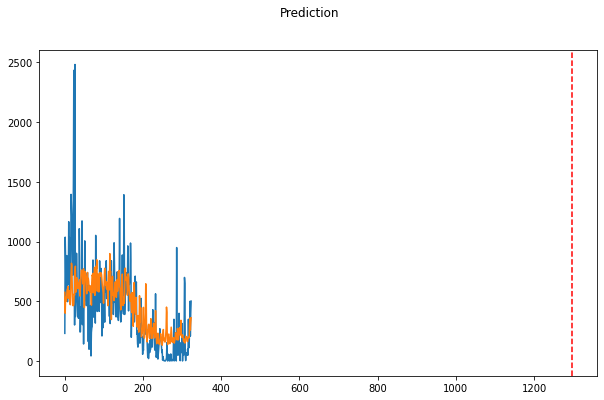

RMSE of validation set: 15.902827018078748
RMSE of entire data set: 6.022650320585299
__STORE NO 2__
Training Shape torch.Size([1180, 1, 3]) torch.Size([1180, 1])
Testing Shape torch.Size([294, 1, 3]) torch.Size([294, 1])
Validation Loss Decreased(inf--->0.00689) 	 Saving The Model
Validation Loss Decreased(0.00689--->0.00623) 	 Saving The Model
Validation Loss Decreased(0.00623--->0.00619) 	 Saving The Model
Epoch 100 		 Training Loss: 0.00826 		 Validation Loss: 0.00708
Epoch 200 		 Training Loss: 0.00798 		 Validation Loss: 0.00746
Epoch 300 		 Training Loss: 0.00744 		 Validation Loss: 0.00819
Epoch 400 		 Training Loss: 0.00698 		 Validation Loss: 0.01206
Epoch 500 		 Training Loss: 0.00676 		 Validation Loss: 0.01158
Stopping the training early		Model saved
	Training Loss:  0.006375333485672908
	Validation Loss:  0.006190573138328979
Shape of data_predict (294, 1)
Shape of dataY_plot (294, 1)


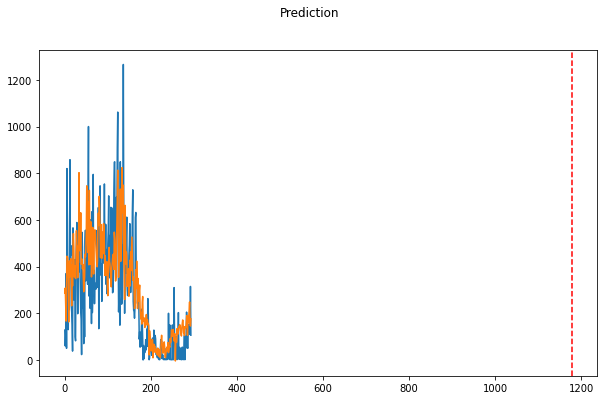

RMSE of validation set: 9.351815903712522
RMSE of entire data set: 4.882449931275471
__STORE NO 3__
Training Shape torch.Size([1276, 1, 3]) torch.Size([1276, 1])
Testing Shape torch.Size([318, 1, 3]) torch.Size([318, 1])
Validation Loss Decreased(inf--->0.01158) 	 Saving The Model
Validation Loss Decreased(0.01158--->0.01155) 	 Saving The Model
Validation Loss Decreased(0.01155--->0.01151) 	 Saving The Model
Validation Loss Decreased(0.01151--->0.01148) 	 Saving The Model
Validation Loss Decreased(0.01148--->0.01145) 	 Saving The Model
Validation Loss Decreased(0.01145--->0.01135) 	 Saving The Model
Validation Loss Decreased(0.01135--->0.01124) 	 Saving The Model
Epoch 100 		 Training Loss: 0.01059 		 Validation Loss: 0.01304
Epoch 200 		 Training Loss: 0.00946 		 Validation Loss: 0.01413
Epoch 300 		 Training Loss: 0.00854 		 Validation Loss: 0.01596
Epoch 400 		 Training Loss: 0.00850 		 Validation Loss: 0.01634
Epoch 500 		 Training Loss: 0.00762 		 Validation Loss: 0.01848
Stopping

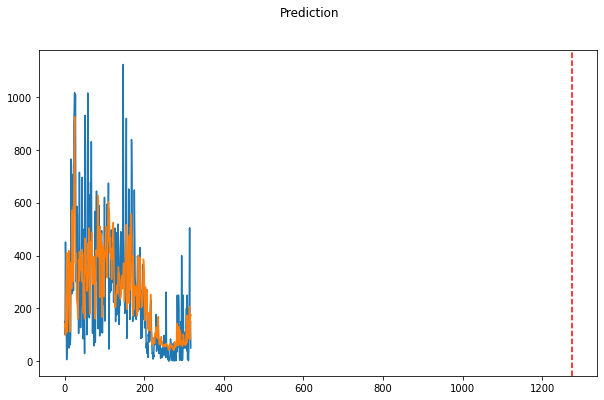

RMSE of validation set: 9.382589122135
RMSE of entire data set: 4.214384441450928
__STORE NO 4__
Training Shape torch.Size([1302, 1, 3]) torch.Size([1302, 1])
Testing Shape torch.Size([325, 1, 3]) torch.Size([325, 1])
Validation Loss Decreased(inf--->0.00875) 	 Saving The Model
Validation Loss Decreased(0.00875--->0.00867) 	 Saving The Model
Validation Loss Decreased(0.00867--->0.00841) 	 Saving The Model
Validation Loss Decreased(0.00841--->0.00838) 	 Saving The Model
Validation Loss Decreased(0.00838--->0.00817) 	 Saving The Model
Epoch 100 		 Training Loss: 0.00895 		 Validation Loss: 0.00879
Epoch 200 		 Training Loss: 0.00870 		 Validation Loss: 0.00945
Epoch 300 		 Training Loss: 0.00833 		 Validation Loss: 0.01109
Epoch 400 		 Training Loss: 0.00801 		 Validation Loss: 0.01327
Epoch 500 		 Training Loss: 0.00787 		 Validation Loss: 0.01529
Stopping the training early		Model saved
	Training Loss:  0.007834384643775661
	Validation Loss:  0.008173932510544546
Shape of data_predict 

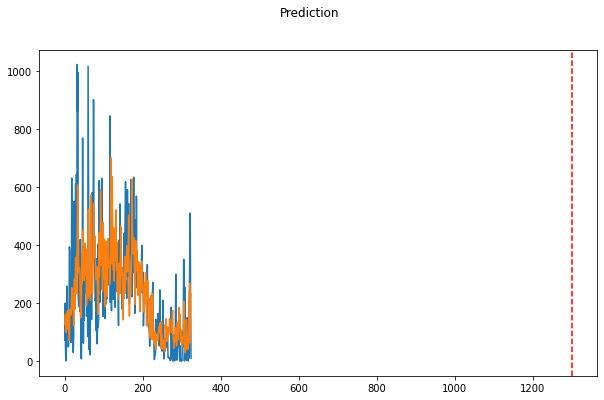

RMSE of validation set: 8.008938216018466
RMSE of entire data set: 3.9428613080879265
__STORE NO 5__
Training Shape torch.Size([1249, 1, 3]) torch.Size([1249, 1])
Testing Shape torch.Size([312, 1, 3]) torch.Size([312, 1])
Validation Loss Decreased(inf--->0.01179) 	 Saving The Model
Validation Loss Decreased(0.01179--->0.01094) 	 Saving The Model
Validation Loss Decreased(0.01094--->0.01043) 	 Saving The Model
Validation Loss Decreased(0.01043--->0.01023) 	 Saving The Model
Validation Loss Decreased(0.01023--->0.01018) 	 Saving The Model
Validation Loss Decreased(0.01018--->0.01018) 	 Saving The Model
Validation Loss Decreased(0.01018--->0.01011) 	 Saving The Model
Epoch 100 		 Training Loss: 0.01036 		 Validation Loss: 0.01140
Epoch 200 		 Training Loss: 0.00822 		 Validation Loss: 0.01240
Epoch 300 		 Training Loss: 0.00791 		 Validation Loss: 0.01182
Epoch 400 		 Training Loss: 0.00761 		 Validation Loss: 0.01176
Epoch 500 		 Training Loss: 0.00729 		 Validation Loss: 0.01225
Stoppin

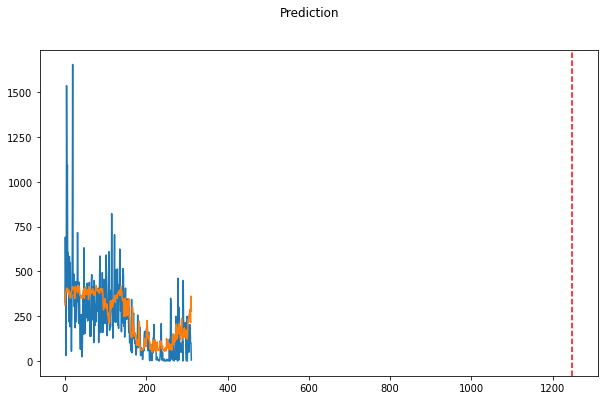

RMSE of validation set: 9.360362175219203
RMSE of entire data set: 4.123058736350258
__STORE NO 6__
Training Shape torch.Size([1306, 1, 3]) torch.Size([1306, 1])
Testing Shape torch.Size([326, 1, 3]) torch.Size([326, 1])
Validation Loss Decreased(inf--->0.00510) 	 Saving The Model
Validation Loss Decreased(0.00510--->0.00393) 	 Saving The Model
Epoch 100 		 Training Loss: 0.00088 		 Validation Loss: 0.00404
Epoch 200 		 Training Loss: 0.00085 		 Validation Loss: 0.00420
Epoch 300 		 Training Loss: 0.00082 		 Validation Loss: 0.00450
Epoch 400 		 Training Loss: 0.00080 		 Validation Loss: 0.00457
Epoch 500 		 Training Loss: 0.00077 		 Validation Loss: 0.00461
Stopping the training early		Model saved
	Training Loss:  0.0007666084520485341
	Validation Loss:  0.003925778661141521
Shape of data_predict (326, 1)
Shape of dataY_plot (326, 1)


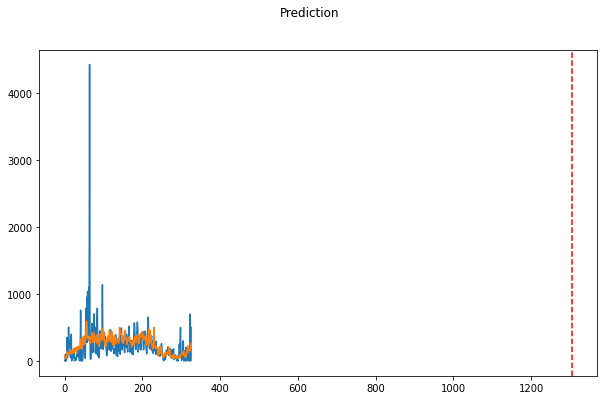

RMSE of validation set: 15.26096028169819
RMSE of entire data set: 4.674422932115359
__STORE NO 7__
Training Shape torch.Size([1270, 1, 3]) torch.Size([1270, 1])
Testing Shape torch.Size([317, 1, 3]) torch.Size([317, 1])
Validation Loss Decreased(inf--->0.01500) 	 Saving The Model
Epoch 100 		 Training Loss: 0.01419 		 Validation Loss: 0.01864
Epoch 200 		 Training Loss: 0.01392 		 Validation Loss: 0.01899
Epoch 300 		 Training Loss: 0.01257 		 Validation Loss: 0.02712
Epoch 400 		 Training Loss: 0.01160 		 Validation Loss: 0.02281
Epoch 500 		 Training Loss: 0.01089 		 Validation Loss: 0.02432
Stopping the training early		Model saved
	Training Loss:  0.011083166759587815
	Validation Loss:  0.015001587301452199
Shape of data_predict (317, 1)
Shape of dataY_plot (317, 1)


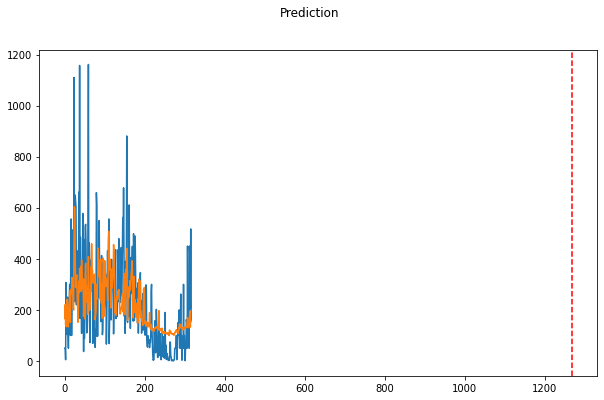

RMSE of validation set: 8.395175006469001
RMSE of entire data set: 4.031244313786817
__STORE NO 8__
Training Shape torch.Size([1149, 1, 3]) torch.Size([1149, 1])
Testing Shape torch.Size([287, 1, 3]) torch.Size([287, 1])
Validation Loss Decreased(inf--->0.01147) 	 Saving The Model
Validation Loss Decreased(0.01147--->0.01137) 	 Saving The Model
Validation Loss Decreased(0.01137--->0.01123) 	 Saving The Model
Validation Loss Decreased(0.01123--->0.01103) 	 Saving The Model
Validation Loss Decreased(0.01103--->0.01087) 	 Saving The Model
Validation Loss Decreased(0.01087--->0.01077) 	 Saving The Model
Validation Loss Decreased(0.01077--->0.01065) 	 Saving The Model
Validation Loss Decreased(0.01065--->0.01055) 	 Saving The Model
Validation Loss Decreased(0.01055--->0.01044) 	 Saving The Model
Validation Loss Decreased(0.01044--->0.01031) 	 Saving The Model
Validation Loss Decreased(0.01031--->0.01026) 	 Saving The Model
Validation Loss Decreased(0.01026--->0.01008) 	 Saving The Model
Val

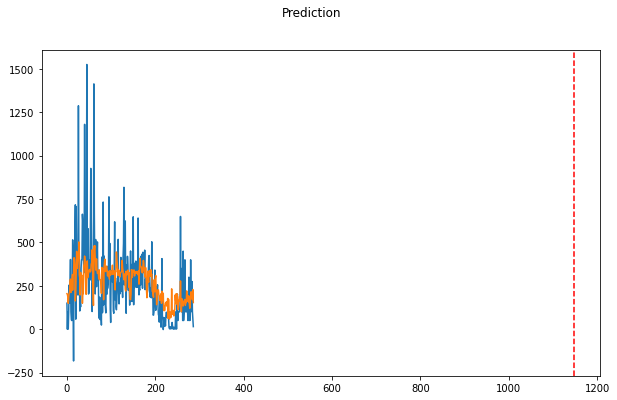

RMSE of validation set: 11.48529800789195
RMSE of entire data set: 4.574869949427991
__STORE NO 9__
Training Shape torch.Size([1243, 1, 3]) torch.Size([1243, 1])
Testing Shape torch.Size([310, 1, 3]) torch.Size([310, 1])
Validation Loss Decreased(inf--->0.02395) 	 Saving The Model
Validation Loss Decreased(0.02395--->0.01623) 	 Saving The Model
Validation Loss Decreased(0.01623--->0.01622) 	 Saving The Model
Validation Loss Decreased(0.01622--->0.01620) 	 Saving The Model
Validation Loss Decreased(0.01620--->0.01612) 	 Saving The Model
Epoch 100 		 Training Loss: 0.00638 		 Validation Loss: 0.01706
Epoch 200 		 Training Loss: 0.00599 		 Validation Loss: 0.01747
Epoch 300 		 Training Loss: 0.00574 		 Validation Loss: 0.02599
Epoch 400 		 Training Loss: 0.00546 		 Validation Loss: 0.03264
Epoch 500 		 Training Loss: 0.00530 		 Validation Loss: 0.02999
Stopping the training early		Model saved
	Training Loss:  0.005114378305652383
	Validation Loss:  0.016115575537854886
Shape of data_predi

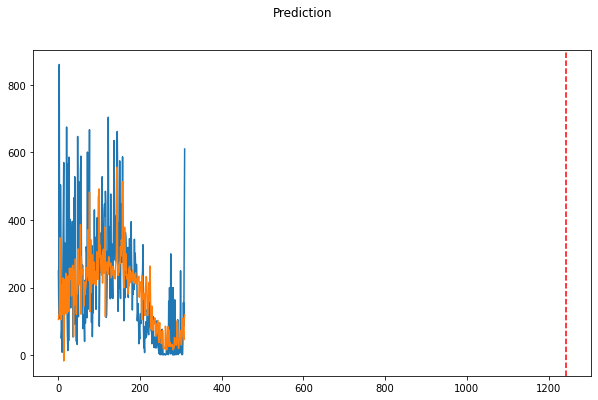

RMSE of validation set: 8.070993018042664
RMSE of entire data set: 2.8731849747390306
__STORE NO 10__
Training Shape torch.Size([1293, 1, 3]) torch.Size([1293, 1])
Testing Shape torch.Size([322, 1, 3]) torch.Size([322, 1])
Validation Loss Decreased(inf--->0.02125) 	 Saving The Model
Validation Loss Decreased(0.02125--->0.02064) 	 Saving The Model
Validation Loss Decreased(0.02064--->0.01978) 	 Saving The Model
Validation Loss Decreased(0.01978--->0.01964) 	 Saving The Model
Validation Loss Decreased(0.01964--->0.01926) 	 Saving The Model
Validation Loss Decreased(0.01926--->0.01916) 	 Saving The Model
Validation Loss Decreased(0.01916--->0.01903) 	 Saving The Model
Validation Loss Decreased(0.01903--->0.01901) 	 Saving The Model
Validation Loss Decreased(0.01901--->0.01900) 	 Saving The Model
Epoch 100 		 Training Loss: 0.01156 		 Validation Loss: 0.02762
Epoch 200 		 Training Loss: 0.01007 		 Validation Loss: 0.03281
Epoch 300 		 Training Loss: 0.00956 		 Validation Loss: 0.02984
Epoc

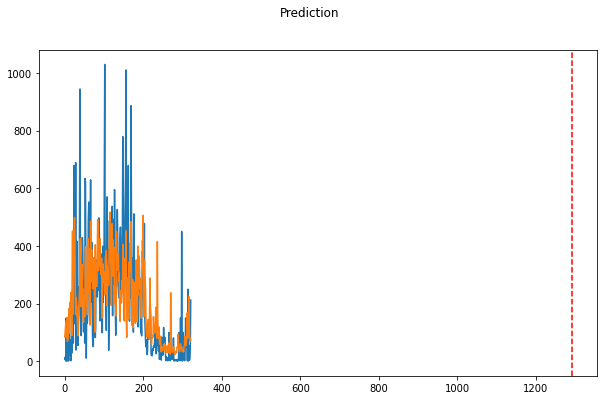

RMSE of validation set: 8.234325345265058
RMSE of entire data set: 3.348847903393424
__STORE NO 11__
Training Shape torch.Size([1121, 1, 3]) torch.Size([1121, 1])
Testing Shape torch.Size([280, 1, 3]) torch.Size([280, 1])
Validation Loss Decreased(inf--->0.02020) 	 Saving The Model
Validation Loss Decreased(0.02020--->0.01678) 	 Saving The Model
Validation Loss Decreased(0.01678--->0.01668) 	 Saving The Model
Validation Loss Decreased(0.01668--->0.01663) 	 Saving The Model
Validation Loss Decreased(0.01663--->0.01642) 	 Saving The Model
Validation Loss Decreased(0.01642--->0.01623) 	 Saving The Model
Validation Loss Decreased(0.01623--->0.01617) 	 Saving The Model
Validation Loss Decreased(0.01617--->0.01602) 	 Saving The Model
Validation Loss Decreased(0.01602--->0.01594) 	 Saving The Model
Validation Loss Decreased(0.01594--->0.01577) 	 Saving The Model
Validation Loss Decreased(0.01577--->0.01550) 	 Saving The Model
Validation Loss Decreased(0.01550--->0.01548) 	 Saving The Model
Va

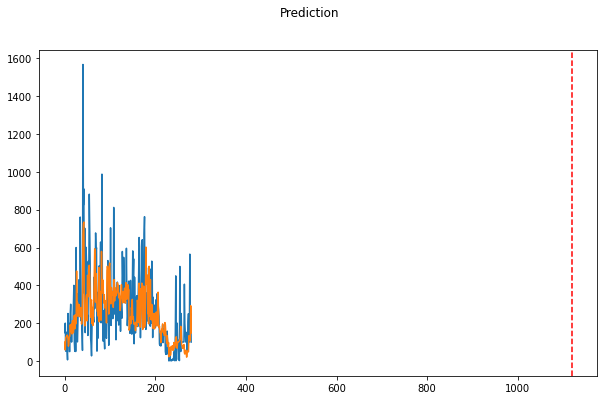

RMSE of validation set: 10.55679105502551
RMSE of entire data set: 4.620856689054533
__STORE NO 12__
Training Shape torch.Size([1315, 1, 3]) torch.Size([1315, 1])
Testing Shape torch.Size([328, 1, 3]) torch.Size([328, 1])
Validation Loss Decreased(inf--->0.01331) 	 Saving The Model
Validation Loss Decreased(0.01331--->0.01300) 	 Saving The Model
Validation Loss Decreased(0.01300--->0.01292) 	 Saving The Model
Validation Loss Decreased(0.01292--->0.01292) 	 Saving The Model
Validation Loss Decreased(0.01292--->0.01287) 	 Saving The Model
Validation Loss Decreased(0.01287--->0.01283) 	 Saving The Model
Validation Loss Decreased(0.01283--->0.01280) 	 Saving The Model
Validation Loss Decreased(0.01280--->0.01278) 	 Saving The Model
Validation Loss Decreased(0.01278--->0.01274) 	 Saving The Model
Validation Loss Decreased(0.01274--->0.01273) 	 Saving The Model
Validation Loss Decreased(0.01273--->0.01270) 	 Saving The Model
Validation Loss Decreased(0.01270--->0.01269) 	 Saving The Model
Va

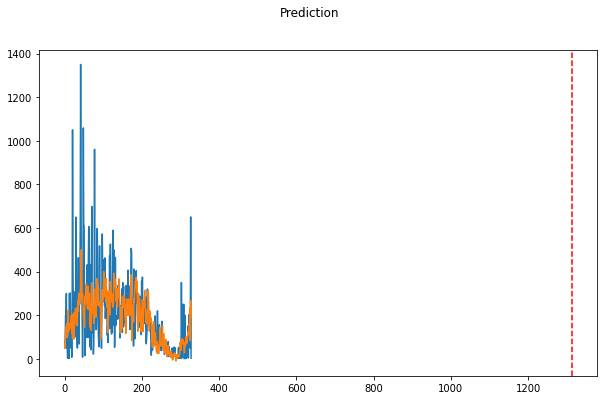

RMSE of validation set: 8.451061290363434
RMSE of entire data set: 3.2788083708643154
__STORE NO 13__
Training Shape torch.Size([1236, 1, 3]) torch.Size([1236, 1])
Testing Shape torch.Size([308, 1, 3]) torch.Size([308, 1])
Validation Loss Decreased(inf--->0.01199) 	 Saving The Model
Validation Loss Decreased(0.01199--->0.01133) 	 Saving The Model
Epoch 100 		 Training Loss: 0.00763 		 Validation Loss: 0.01364
Epoch 200 		 Training Loss: 0.00713 		 Validation Loss: 0.01368
Epoch 300 		 Training Loss: 0.00699 		 Validation Loss: 0.01260
Epoch 400 		 Training Loss: 0.00666 		 Validation Loss: 0.01334
Epoch 500 		 Training Loss: 0.00635 		 Validation Loss: 0.01430
Stopping the training early		Model saved
	Training Loss:  0.0064043109161318855
	Validation Loss:  0.011325046301036227
Shape of data_predict (308, 1)
Shape of dataY_plot (308, 1)


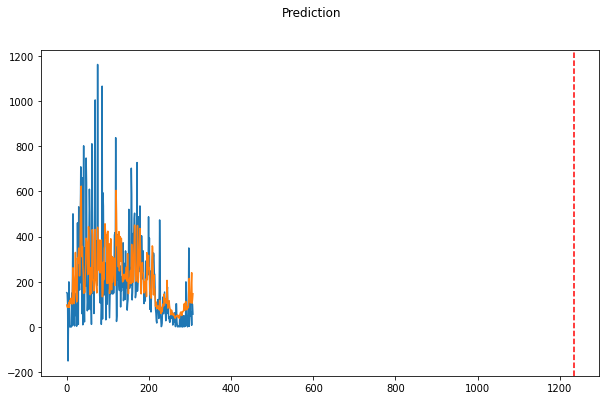

RMSE of validation set: 9.404948601846783
RMSE of entire data set: 3.7536872320644044
__STORE NO 14__
Training Shape torch.Size([1249, 1, 3]) torch.Size([1249, 1])
Testing Shape torch.Size([312, 1, 3]) torch.Size([312, 1])
Validation Loss Decreased(inf--->0.00938) 	 Saving The Model
Validation Loss Decreased(0.00938--->0.00927) 	 Saving The Model
Validation Loss Decreased(0.00927--->0.00853) 	 Saving The Model
Validation Loss Decreased(0.00853--->0.00843) 	 Saving The Model
Validation Loss Decreased(0.00843--->0.00840) 	 Saving The Model
Validation Loss Decreased(0.00840--->0.00837) 	 Saving The Model
Validation Loss Decreased(0.00837--->0.00834) 	 Saving The Model
Validation Loss Decreased(0.00834--->0.00833) 	 Saving The Model
Validation Loss Decreased(0.00833--->0.00832) 	 Saving The Model
Validation Loss Decreased(0.00832--->0.00828) 	 Saving The Model
Validation Loss Decreased(0.00828--->0.00818) 	 Saving The Model
Validation Loss Decreased(0.00818--->0.00815) 	 Saving The Model
V

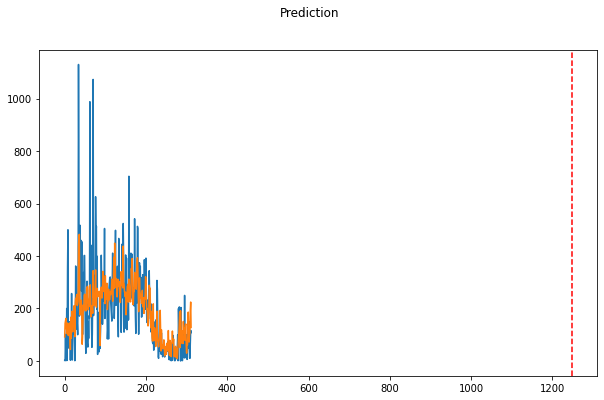

RMSE of validation set: 7.079045908875694
RMSE of entire data set: 2.6546423292235732
__STORE NO 15__
Training Shape torch.Size([1264, 1, 3]) torch.Size([1264, 1])
Testing Shape torch.Size([315, 1, 3]) torch.Size([315, 1])
Validation Loss Decreased(inf--->0.01570) 	 Saving The Model
Validation Loss Decreased(0.01570--->0.01416) 	 Saving The Model
Epoch 100 		 Training Loss: 0.00765 		 Validation Loss: 0.01530
Epoch 200 		 Training Loss: 0.00702 		 Validation Loss: 0.01643
Epoch 300 		 Training Loss: 0.00635 		 Validation Loss: 0.01696
Epoch 400 		 Training Loss: 0.00617 		 Validation Loss: 0.01732
Epoch 500 		 Training Loss: 0.00575 		 Validation Loss: 0.02347
Stopping the training early		Model saved
	Training Loss:  0.0056320950598392
	Validation Loss:  0.014156746566700547
Shape of data_predict (315, 1)
Shape of dataY_plot (315, 1)


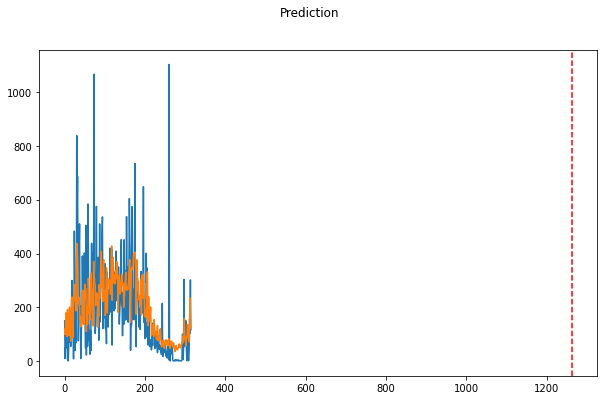

RMSE of validation set: 7.434705190194716
RMSE of entire data set: 3.0118045122365653
__STORE NO 16__
Training Shape torch.Size([1247, 1, 3]) torch.Size([1247, 1])
Testing Shape torch.Size([311, 1, 3]) torch.Size([311, 1])
Validation Loss Decreased(inf--->0.02162) 	 Saving The Model
Validation Loss Decreased(0.02162--->0.02148) 	 Saving The Model
Validation Loss Decreased(0.02148--->0.02129) 	 Saving The Model
Validation Loss Decreased(0.02129--->0.02129) 	 Saving The Model
Validation Loss Decreased(0.02129--->0.02128) 	 Saving The Model
Validation Loss Decreased(0.02128--->0.02071) 	 Saving The Model
Epoch 100 		 Training Loss: 0.00553 		 Validation Loss: 0.02182
Epoch 200 		 Training Loss: 0.00519 		 Validation Loss: 0.02117
Epoch 300 		 Training Loss: 0.00495 		 Validation Loss: 0.02233
Epoch 400 		 Training Loss: 0.00469 		 Validation Loss: 0.02326
Epoch 500 		 Training Loss: 0.00462 		 Validation Loss: 0.02260
Stopping the training early		Model saved
	Training Loss:  0.00446891816

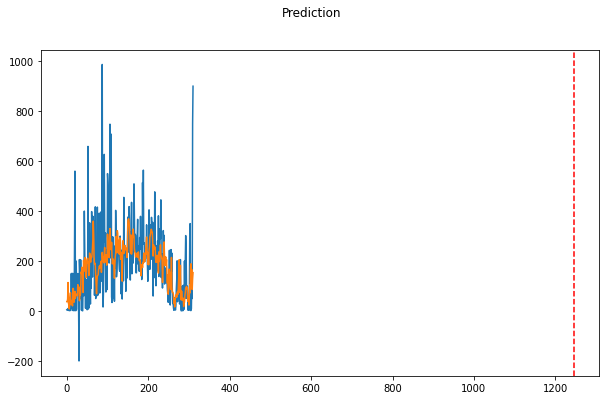

RMSE of validation set: 7.831740415850558
RMSE of entire data set: 2.9187667413258356
__STORE NO 17__
Training Shape torch.Size([1283, 1, 3]) torch.Size([1283, 1])
Testing Shape torch.Size([320, 1, 3]) torch.Size([320, 1])
Validation Loss Decreased(inf--->0.01049) 	 Saving The Model
Validation Loss Decreased(0.01049--->0.01046) 	 Saving The Model
Validation Loss Decreased(0.01046--->0.01036) 	 Saving The Model
Validation Loss Decreased(0.01036--->0.01030) 	 Saving The Model
Validation Loss Decreased(0.01030--->0.01027) 	 Saving The Model
Validation Loss Decreased(0.01027--->0.01023) 	 Saving The Model
Epoch 100 		 Training Loss: 0.00551 		 Validation Loss: 0.01049
Validation Loss Decreased(0.01023--->0.01023) 	 Saving The Model
Epoch 200 		 Training Loss: 0.00524 		 Validation Loss: 0.01136
Epoch 300 		 Training Loss: 0.00502 		 Validation Loss: 0.01232
Epoch 400 		 Training Loss: 0.00493 		 Validation Loss: 0.01338
Epoch 500 		 Training Loss: 0.00477 		 Validation Loss: 0.01251
Epoch 

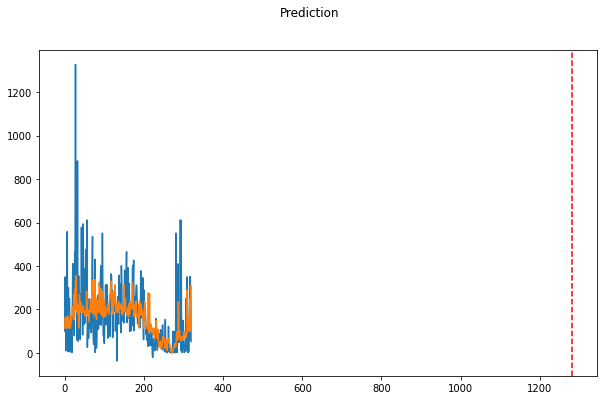

RMSE of validation set: 7.793650260206493
RMSE of entire data set: 2.9592259189142767
__STORE NO 18__
Training Shape torch.Size([1270, 1, 3]) torch.Size([1270, 1])
Testing Shape torch.Size([317, 1, 3]) torch.Size([317, 1])
Validation Loss Decreased(inf--->0.00906) 	 Saving The Model
Validation Loss Decreased(0.00906--->0.00887) 	 Saving The Model
Validation Loss Decreased(0.00887--->0.00885) 	 Saving The Model
Validation Loss Decreased(0.00885--->0.00884) 	 Saving The Model
Epoch 100 		 Training Loss: 0.00854 		 Validation Loss: 0.01021
Epoch 200 		 Training Loss: 0.00796 		 Validation Loss: 0.01090
Epoch 300 		 Training Loss: 0.00724 		 Validation Loss: 0.01385
Epoch 400 		 Training Loss: 0.00654 		 Validation Loss: 0.01450
Epoch 500 		 Training Loss: 0.00618 		 Validation Loss: 0.01419
Stopping the training early		Model saved
	Training Loss:  0.006449740642462959
	Validation Loss:  0.008837680566142333
Shape of data_predict (317, 1)
Shape of dataY_plot (317, 1)


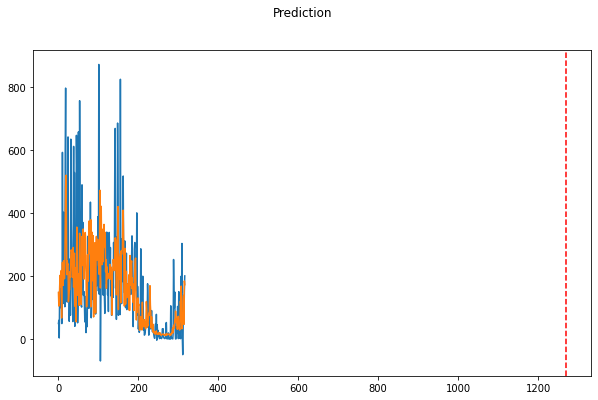

RMSE of validation set: 7.109410217475189
RMSE of entire data set: 3.2718308502813818
__STORE NO 19__
Training Shape torch.Size([1129, 1, 3]) torch.Size([1129, 1])
Testing Shape torch.Size([282, 1, 3]) torch.Size([282, 1])
Validation Loss Decreased(inf--->0.02460) 	 Saving The Model
Validation Loss Decreased(0.02460--->0.02328) 	 Saving The Model
Validation Loss Decreased(0.02328--->0.02306) 	 Saving The Model
Epoch 100 		 Training Loss: 0.01170 		 Validation Loss: 0.02600
Epoch 200 		 Training Loss: 0.01011 		 Validation Loss: 0.03256
Epoch 300 		 Training Loss: 0.00986 		 Validation Loss: 0.03654
Epoch 400 		 Training Loss: 0.00916 		 Validation Loss: 0.03858
Epoch 500 		 Training Loss: 0.00876 		 Validation Loss: 0.03866
Stopping the training early		Model saved
	Training Loss:  0.00878867225033047
	Validation Loss:  0.023055245467860783
Shape of data_predict (282, 1)
Shape of dataY_plot (282, 1)


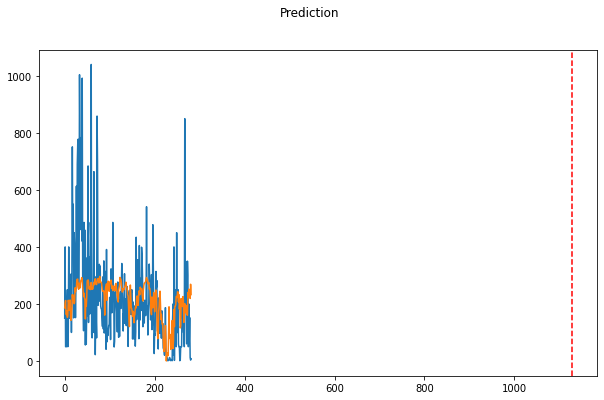

RMSE of validation set: 10.128829899986629
RMSE of entire data set: 3.7364033289715275
__STORE NO 20__
Training Shape torch.Size([1163, 1, 3]) torch.Size([1163, 1])
Testing Shape torch.Size([290, 1, 3]) torch.Size([290, 1])
Validation Loss Decreased(inf--->0.01078) 	 Saving The Model
Epoch 100 		 Training Loss: 0.00711 		 Validation Loss: 0.01252
Epoch 200 		 Training Loss: 0.00688 		 Validation Loss: 0.01256
Validation Loss Decreased(0.01078--->0.01073) 	 Saving The Model
Epoch 300 		 Training Loss: 0.00600 		 Validation Loss: 0.01417
Epoch 400 		 Training Loss: 0.00559 		 Validation Loss: 0.01637
Epoch 500 		 Training Loss: 0.00539 		 Validation Loss: 0.01692
Epoch 600 		 Training Loss: 0.00504 		 Validation Loss: 0.01525
Epoch 700 		 Training Loss: 0.00481 		 Validation Loss: 0.01658
Stopping the training early		Model saved
	Training Loss:  0.004648310622515271
	Validation Loss:  0.010725283451999227
Shape of data_predict (290, 1)
Shape of dataY_plot (290, 1)


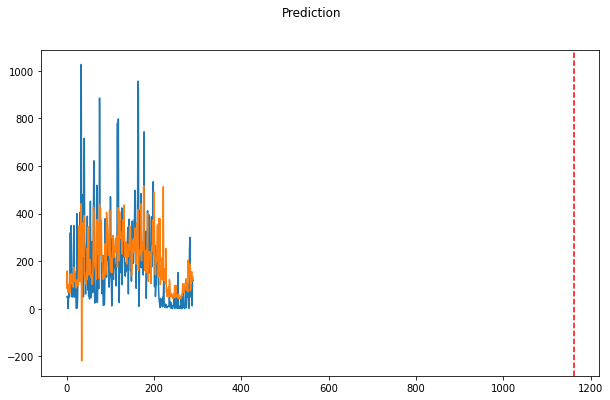

RMSE of validation set: 8.716186833035174
RMSE of entire data set: 3.2769058154719968


In [205]:
for store in range(1,21):
    print("__STORE NO {}__".format(store))
    try:
        model2_total = pd.read_csv("./predictions/salesAnalyzer/total/store_{}.csv".format(store))
        model2_total = model2_total.iloc[:-16,:]

        model3_total = pd.read_csv("./IBM_Cloud/predictions/model-1/predictions_total.csv".format(store))
        model3_total = model3_total[model3_total["SCRUB_STORE_NO"] == store].iloc[14:,:]

        training = pd.read_csv("./LSTM - Weather Sales Forecast/datasets/training.csv")
        training = training[training["SCRUB_STORE_NO"] == store].iloc[14:,:]["SALES_UNITS"].to_numpy()

        dataset = model2_total.iloc[:,-2:].copy()
        b = model3_total.iloc[:,-1:].copy()
        dataset["FORECAST_3"] = b["predictions"].to_numpy()
        dataset["ORIGINAL"] = training
    except:
        model2_total = pd.read_csv("./predictions/salesAnalyzer/total/store_{}.csv".format(store))
        model2_total = model2_total.iloc[:-15:]

        model3_total = pd.read_csv("./IBM_Cloud/predictions/model-1/predictions_total.csv".format(store))
        model3_total = model3_total[model3_total["SCRUB_STORE_NO"] == store].iloc[14:,:]

        training = pd.read_csv("./LSTM - Weather Sales Forecast/datasets/training.csv")
        training = training[training["SCRUB_STORE_NO"] == store].iloc[14:,:]["SALES_UNITS"].to_numpy()

        dataset = model2_total.iloc[:,-2:].copy()
        b = model3_total.iloc[:,-1:].copy()
        dataset["FORECAST_3"] = b["predictions"].to_numpy()
        dataset["ORIGINAL"] = training

    train_split = 0.8

    rows = int(train_split*dataset.shape[0])

    X = dataset.iloc[:,:3].values
    y = dataset.iloc[:,3:].values

    mm = MinMaxScaler()
    ss = StandardScaler()

    X_ss = ss.fit_transform(X)
    y_mm = mm.fit_transform(y)

    X_train = X_ss[:rows+1, :]
    X_test = X_ss[rows+1:, :]

    y_train = y_mm[:rows+1, :]
    y_test = y_mm[rows+1:, :] 

    data_X = Variable(torch.Tensor(X_ss))
    data_y = Variable(torch.Tensor(y_mm))

    X_train_tensors = Variable(torch.Tensor(X_train))
    X_test_tensors = Variable(torch.Tensor(X_test))

    y_train_tensors = Variable(torch.Tensor(y_train))
    y_test_tensors = Variable(torch.Tensor(y_test)) 

    data_X_tensors = torch.reshape(data_X,   (data_X.shape[0], 1, data_X.shape[1]))
    X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
    X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

    print("Training Shape", X_train_tensors_final.shape, y_train_tensors.shape)
    print("Testing Shape", X_test_tensors_final.shape, y_test_tensors.shape) 

    X_train,y_train,X_val,y_val = X_train_tensors_final, y_train_tensors, X_test_tensors_final, y_test_tensors

    train_loader = dataloader(X_train,y_train,batch_size=14)
    valid_loader = dataloader(X_val,y_val,batch_size=14)

    num_epochs = 1000 #1000 epochs
    learning_rate = 3e-3 #0.001 lr

    input_size = 3 #number of features
    hidden_size = 40 #number of features in hidden state
    num_layers = 1 #number of stacked lstm layers

    num_classes = 1 #number of output classes

    lstm = LSTM_Final(num_classes, input_size, hidden_size, num_layers) #our lstm class 
    criterion = torch.nn.MSELoss()    # mean-squared error for regression
    optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate) 


    PATH='./saved-models/saved_model_store_{}.pth'.format(store)

    min_valid_loss = np.inf
    current_threshold = 0
    cutoff_threshold = num_epochs/2

    for epoch in range(num_epochs):
        '''---training---'''
        train_loss = 0.0
        lstm.train()

        for i in train_loader:
            data = i["data"]
            output = i["output"]

            outputs = lstm(data)
            optimizer.zero_grad()

            # obtain the loss function
            loss = criterion(outputs, output)

            loss.backward()

            optimizer.step()

            train_loss += loss.item()

        train_loss = train_loss / len(train_loader)

        '''---validation---'''
        valid_loss = 0.0
        lstm.eval() 

        for i in valid_loader:
            val_input = i["data"]
            val_output = i["output"]

            outputs = lstm(val_input)

            loss = criterion(outputs,val_output)

            valid_loss += loss.item()

        valid_loss = valid_loss / len(valid_loader)

        if (epoch + 1) % 100 == 0:
            print('Epoch %d \t\t Training Loss: %1.5f \t\t Validation Loss: %1.5f'%(epoch+1,train_loss,valid_loss))
    #         logger.log('Epoch %d \t\t Training Loss: %1.5f \t\t Validation Loss: %1.5f'%(epoch+1,train_loss,valid_loss))

        if min_valid_loss > valid_loss:
            current_threshold = 0
            print(f'Validation Loss Decreased({min_valid_loss:1.5f}--->{valid_loss:1.5f}) \t Saving The Model')
    #         logger.log(f'Validation Loss Decreased({min_valid_loss:1.5f}--->{valid_loss:1.5f}) \t Saving The Model')
            min_valid_loss = valid_loss

            # Saving State Dict
            torch.save(lstm.state_dict(), PATH)
        else:
            current_threshold += 1

            if current_threshold == cutoff_threshold:
                print("Stopping the training early\t\tModel saved")
                print("\tTraining Loss: ",train_loss)
                print("\tValidation Loss: ",min_valid_loss)

    #             logger.log("Stopping the training early\t\tModel saved")
    #             logger.log("\tTraining Loss: {}".format(train_loss))
    #             logger.log("\tValidation Loss: {}".format(min_valid_loss))
    #             logger.log("\n\n\n")

                break

    lstm = LSTM_Final(num_classes, input_size, hidden_size, num_layers)
    lstm.load_state_dict(torch.load(PATH))
    lstm.eval()


    train_predict = lstm(X_val)

    data_predict = train_predict.data.numpy()
    dataY_plot = y_val.data.numpy()

    print("Shape of data_predict {}".format(data_predict.shape))
    print("Shape of dataY_plot {}".format(dataY_plot.shape))

    data_predict = mm.inverse_transform(data_predict)
    dataY_plot = mm.inverse_transform(dataY_plot)

    plt.figure(figsize=(10,6))

    plt.axvline(x=rows, c='r', linestyle='--')

    plt.plot(dataY_plot)
    plt.plot(data_predict)
    plt.suptitle('Prediction')
    plt.show()

    print("RMSE of validation set: {}".format(RMSE(data_predict,dataY_plot)))
    # logger.log("RMSE of validation set: {}".format(RMSE(data_predict,dataY_plot)))

    train_predict = lstm(data_X_tensors)

    data_predict = train_predict.data.numpy()
    dataY_plot = data_y.data.numpy()

    data_predict = mm.inverse_transform(data_predict)
    dataY_plot = mm.inverse_transform(dataY_plot)

    print("RMSE of entire data set: {}".format(RMSE(data_predict,dataY_plot)))
    # logger.log("RMSE of entire data set: {}".format(RMSE(data_predict,dataY_plot)))



